#                                                   Introduction of Polynomial Regression.
```js
1) Linear Polynomial Regression VS Polynomial Regression :
   -------------------------------------------------------
   In a Linear Regression Dataset, if we draw the scatter plot, we can see that the scatterplot resembles a line shape or almost. Hence we can draw a Best Fit Line.

But in many Dataset, the scatterplot doesn’t resemble Line Shape at all e.g. 🌙 shape. Hence there is no (Single) "Straight" Best Line we can draw here that goes through all the points (See 'poly_line.png'). BUT we can obviously draw "Non Straight (Best) Line" that can go through all those ponts, right? This is Polynomial Regression where the Best Line is Non-Straight. E.g. look at the last codeblock’s graph.

2) Polynomial Regression :
   -----------------------
   (LR = Linear Regression, PR = Polynomial Regression) LR returns Points which make Straight Best Line and PR returns Points which make 'Non Straight Best Line which is made of many Straight Best Lines'. We need all the points of all the mini straight_best_lines and LR helps us to do find them. How? PR is 'alias' of LR where if the Non Linear Dataset is Polynomial Dataset, then we can "apply PR(i.e. LR) on that Polynomial Dataset to find the Non Straight Best Line".

   Summary : You have a Non Linear Dataset which doesn’t return a Straight Best Regression Line. So you convert that Non Linear Dataset into Polynomial Dataset and apply PR(which is actually LR) on that Polynomial Dataset.

3) Conversion of a Non Linear Dataset into Polynomial Dataset :
   ------------------------------------------------------------
   'poly_line.png' : Convert only the input columns by adding more input columns. See 'poly_conversion.png' where we assumed (x, y) are Non Linear Data.

4) Training and Pedicting :
   ------------------------
   Now usingg the Polynomial Dataset we’ve created from the Non Linear Dataset, we feed it to the PR(LR) Model and do prediction from this.

5) Draw Scatterplot and Polynomial Regression Line after model training :
   ----------------------------------------------------------------------
   i)  What we want to do eventually? Isn’t it "poly_line_on_actual_dataset.png"? Plotting the Polynomial Regression Line on the actual Non Linear Dataset?

   ii) For model training and prediction we need the Polynomial Dataset, yes, but ultimately we’ll draw the Regression Line on the Actual Non Linear Dataset, not on the Polynomial Dataset which is used only because our dataset is Non Linear and we can’t train our model with non linear dataset. From that "poly_line_on_actual_dataset.png",

      Non Linear value of 3 --> Polynomial value of [.., .., .., ..] --> Feed that Polynomial value to PR(LR) Model --> Predicted value is 18.
   
   So ultimately for Non Linear value of 3, we’ve got Predicted value 18. This 18 is a part of the Polynomial Regression Line we want to create, right? So after training, we create scatterplot on the actual dataset((x_train, y_train) and (x_test, y_test)) and then plot Polynomial Regression Line by predicting the x_train or x_test.
```

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#                                   Import Non Linear Dataset and Visualize it's Scatterplot and Regression Line.

<Axes: xlabel='Temperature (°C)', ylabel='Ice Cream Sales (units)'>

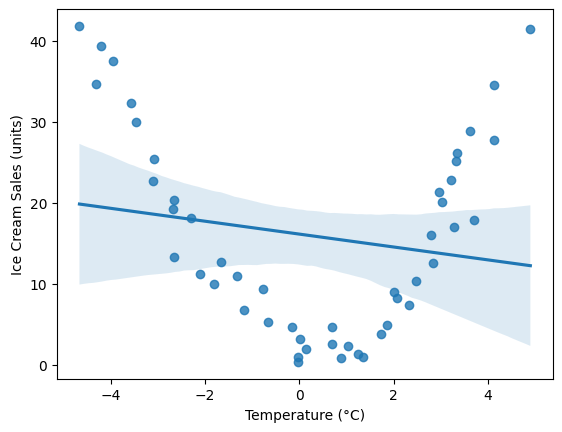

In [37]:
df = pd.read_csv(r"D:\VS CODE\Data Science\Machine Learning\linear_regression\Dataset\Ice_cream selling data.csv")

sns.regplot(data=df, x="Temperature (°C)", y="Ice Cream Sales (units)", scatter=True)

#                                   Convert the Non Linear Dataset into Polynomial Dataset.

In [38]:
X, Y = df[['Temperature (°C)']], df['Ice Cream Sales (units)'] # X.shape = (49, 1), Y.shape = (49,).

# x_train = (39, 1), y_train = (39,), x_test = (10, 1), y_test = (10,).
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2) # returns Pandas Dataframes for x_t..
                                                                                         # and Series for y_t... .

poly = PolynomialFeatures(degree = 3, include_bias = True) # For degree = 3, we'll have 4 input columns for 1 input column.

x_train_transformed = poly.fit_transform(X = x_train) # returns numpy array of (39, 4) shape.
x_test_transformed  = poly.transform(X = x_test)      # returns numpy array of (10, 4) shape.

explanation = """
So, our final Training Dataset is (x_train_transformed, y_train) :

shape: (39, 5)
┌─────┬───────────┬───────────┬────────────┬───────────┐    x = Temperature (°C), y = Ice Cream Sales (units).
│ x^0 ┆ x^1       ┆ x^2       ┆ x^3        ┆ y         │
│ --- ┆ ---       ┆ ---       ┆ ---        ┆ ---       │
│ f64 ┆ f64       ┆ f64       ┆ f64        ┆ f64       │
╞═════╪═══════════╪═══════════╪════════════╪═══════════╡
│ 1.0 ┆ -4.213985 ┆ 17.757668 ┆ -74.830541 ┆ 39.383001 │
│ 1.0 ┆ -2.652287 ┆ 7.034625  ┆ -18.657844 ┆ 20.279679 │
│ 1.0 ┆ -0.77333  ┆ 0.598039  ┆ -0.462482  ┆ 9.392969  │
│ 1.0 ┆ 1.74      ┆ 3.0276    ┆ 5.268024   ┆ 3.78257   │
│ 1.0 ┆ 0.693599  ┆ 0.481079  ┆ 0.333676   ┆ 4.625689  │
│ …   ┆ …         ┆ …         ┆ …          ┆ …         │
└─────┴───────────┴───────────┴────────────┴───────────┘

And final Test Dataset is (x_test_transformed, y_test) :

shape: (10, 5)
┌─────┬───────────┬───────────┬─────────────┬───────────┐    x = Temperature (°C), y = Ice Cream Sales (units).
│ x^0 ┆ x^1       ┆ x^2       ┆ x^3         ┆ y         │
│ --- ┆ ---       ┆ ---       ┆ ---         ┆ ---       │
│ f64 ┆ f64       ┆ f64       ┆ f64         ┆ f64       │
╞═════╪═══════════╪═══════════╪═════════════╪═══════════╡
│ 1.0 ┆ 0.149245  ┆ 0.022274  ┆ 0.003324    ┆ 1.931416  │
│ 1.0 ┆ -2.11187  ┆ 4.459994  ┆ -9.418925   ┆ 11.218294 │
│ 1.0 ┆ 3.316073  ┆ 10.996337 ┆ 36.464651   ┆ 25.142082 │
│ 1.0 ┆ -1.173123 ┆ 1.376218  ┆ -1.614474   ┆ 6.689123  │
│ 1.0 ┆ 2.471946  ┆ 6.110517  ┆ 15.104868   ┆ 10.336631 │
│ 1.0 ┆ 3.610778  ┆ 13.037721 ┆ 47.076323   ┆ 28.912188 │
│ 1.0 ┆ 4.133534  ┆ 17.086102 ┆ 70.625978   ┆ 27.698383 │
│ 1.0 ┆ -1.818938 ┆ 3.308534  ┆ -6.018017   ┆ 10.012868 │
│ 1.0 ┆ -1.660348 ┆ 2.756755  ┆ -4.577171   ┆ 12.615181 │
│ 1.0 ┆ -4.662263 ┆ 21.736693 ┆ -101.342174 ┆ 41.842986 │
└─────┴───────────┴───────────┴─────────────┴───────────┘
"""

#                                       Train Linear Regression Model using the Polynomial Dataset.

In [39]:
lr = LinearRegression()
lr.fit(X = x_train_transformed, y = y_train) # feeding Polynomial Training Dataset to LR Model.

print(f"Coefficients = {lr.coef_}.") # For 4 input columns, 4 coefficients.
print(f"Intercept    = {lr.intercept_}.\n")

# Now from the Polynomial Testing Dataset, predict the output("Ice Cream Sales (units)") for the first 2 rows.
print(f"For x_test_transformed[:2], these first two value's Predicted Values = {lr.predict(X = x_test_transformed[:2])}.")

info = """
x_test_transformed[:2] =

array([ [ 1.00000000e+00,  1.49244574e-01,  2.22739429e-02, 3.32426512e-03],
        [ 1.00000000e+00, -2.11186969e+00,  4.45999359e+00, -9.41892528e+00] ])
"""

Coefficients = [ 0.         -1.59389398  1.83344444  0.05077371].
Intercept    = 3.051807560197929.

For x_test_transformed[:2], these first two value's Predicted Values = [ 2.85493435 14.11682064].


#                                   Visualize the Polynomial Regression Line.

Text(0.5, 1.0, 'Polynomial Regression Line(Green Curvy Resembled Line)')

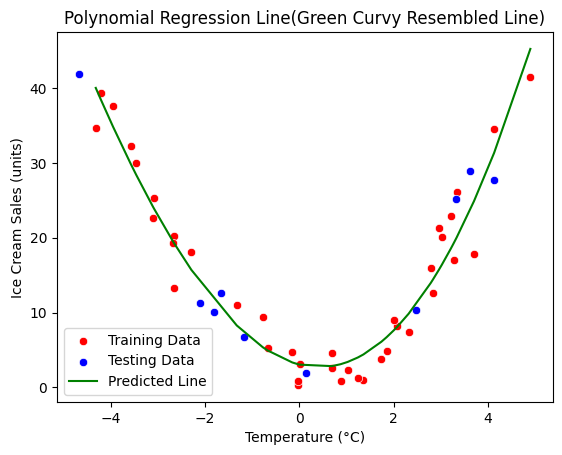

In [40]:
sns.scatterplot(x = x_train['Temperature (°C)'], y = y_train, color = 'red',  label = "Training Data")
sns.scatterplot(x = x_test['Temperature (°C)'] , y = y_test,  color = 'blue', label = "Testing Data")
sns.lineplot(   x = x_train['Temperature (°C)'], y = lr.predict(X = x_train_transformed), color = 'green', label = "Predicted Line")
plt.title("Polynomial Regression Line(Green Curvy Resembled Line)")

#                               Measurement of the model using MAE, MSE, RMSE and R2 Score.

In [42]:
y_predict = lr.predict(x_test_transformed)

print(f"Mean Absolute Error = {mean_absolute_error(y_true = y_test, y_pred = y_predict)}.") # returns 'loss'. The less, the good.
print(f"Mean Squared Error = {mean_squared_error(y_true = y_test, y_pred = y_predict)}.") # returns 'loss'. The less, the good.
print(f"Root mean_squared_error = {np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_predict))}.") # returns 'loss'. The less, the good.

print(f"r2 score = {r2_score(y_true = y_test, y_pred = y_predict)}.") # shows how well the y predicted values explain the variance in 'y_test'.

Mean Absolute Error = 2.674415103855035.
Mean Squared Error = 9.934718007538141.
Root mean_squared_error = 3.1519387696365775.
r2 score = 0.929788979493679.
